Connected to venv (Python 3.11.5)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# directorys of rock, paper, and scissors
train_dir = './rock_paper_scissors/train/'
test_dir = './rock_paper_scissors/val/'

In [3]:
# get the list of files in each directory
train_files = os.listdir(train_dir)
train_image_paths = np.array([file for file in train_files if file.endswith('.jpg')])
train_label_paths = np.array([file for file in train_files if file.endswith('.txt')])

test_files = os.listdir(test_dir)
test_image_paths = np.array([file for file in test_files if file.endswith('.jpg')])
test_label_paths = np.array([file for file in test_files if file.endswith('.txt')])

In [4]:
def load_image(root, image_path):
    return plt.imread(root + image_path)

def load_label(root, label_path):
    data = np.loadtxt(root + label_path)
    if data[0] == 0:
        return np.array([1, 0, 0, data[1], data[2], data[3], data[4]])
    elif data[0] == 1:
        return np.array([0, 1, 0, data[1], data[2], data[3], data[4]])
    elif data[0] == 2:
        return np.array([0, 0, 1, data[1], data[2], data[3], data[4]])

    # return np.loadtxt(root + label_path)

In [5]:
def load_data(root, image_paths, label_paths):
    images = []
    labels = []
    for image_path, label_path in zip(image_paths, label_paths):
        images.append(load_image(root, image_path))
        labels.append(load_label(root, label_path))
    return np.array(images), np.array(labels)


In [6]:
train_images, train_labels = load_data(train_dir, train_image_paths, train_label_paths)
test_images, test_labels = load_data(test_dir, test_image_paths, test_label_paths)

[0.         1.         0.         0.48671875 0.62604167 0.3296875
 0.32708333]


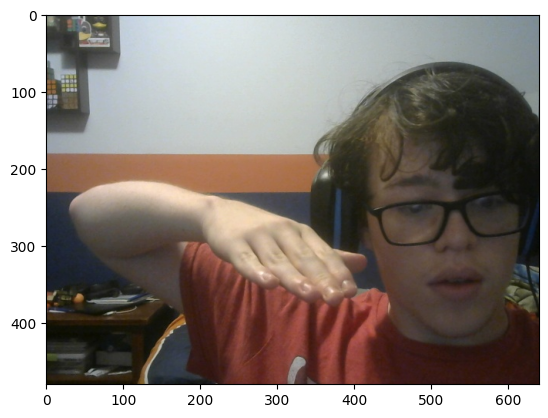

In [7]:
# show the first image and the label 
plt.imshow(train_images[0])
print(train_labels[0])

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
print(train_images.shape)
print(train_labels.shape)

(12, 480, 640, 3)
(12, 7)


In [10]:
import tensorflow as tf


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(480, 640, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [12]:
# model.compile(optimizer='adam', loss='binary_crossentropy')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
print(train_images.shape,
train_labels.shape)

(12, 480, 640, 3) (12, 7)


In [14]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7021 - accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 12.1856 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 10.3646 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 8.4235 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 4.0627 - accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 2.2187 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 2.9162 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 2.1151 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 1.3377 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 1s 1s/step - loss: 1.0843 - accuracy: 0.3333
Epoch 11/100
1/1 

In [16]:
# tst using webcam
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

cap = cv2.VideoCapture(
    0
)  # 0 is typically the default camera (you might need to change this if you have multiple cameras)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open the webcam.")
    exit()

# Define the interval (in milliseconds)
interval_ms = 1

# Create a variable to track the last capture time
last_capture_time = time.time()

try:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()

        # Check if the frame was captured successfully
        if not ret:
            print("Error: Could not read a frame.")
            break

        # Check if it's time to capture a new image
        current_time = time.time()
        if current_time - last_capture_time >= interval_ms / 1000:
            # Save the captured frame as an image
            timestamp = int(time.time())
            image_filename = f"image_{timestamp}.jpg"

            # run the model on the image
            image = cv2.resize(frame, (640, 480))
            image = image / 255.0
            image = np.array([image])
            prediction = model.predict(image, verbose=0)
            
            # print(prediction)
            
            # draw the bounding box
            t1, t2, t3, x, y, w, h = prediction[0]
            print(t1, t2, t3)

            # draw rectangle
            cv2.rectangle(frame, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)

            # Update the last capture time
            last_capture_time = current_time

        # Display the frame (optional)
        cv2.imshow("Webcam Capture", frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

finally:
    # Release the webcam and close any OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


0.00046053724 0.09169732 0.03687786
0.00052302255 0.08660347 0.03453821
0.0005010834 0.09019353 0.034140937
0.000519543 0.08890133 0.036053322
0.0005050504 0.09044833 0.035173696
0.00051199785 0.089856885 0.036300495
0.000514152 0.0904217 0.03639068
0.0005672105 0.09194471 0.0351727
0.0005719895 0.0853182 0.036248326
0.0005548316 0.08927261 0.035982773
0.00054186827 0.09546648 0.03819711
0.0004924538 0.106510684 0.039132074
0.0004924538 0.106510684 0.039132074
0.00050069223 0.10667048 0.04102469
0.00047633384 0.10592078 0.042253345
0.00048091038 0.09963126 0.04289167
0.0004732351 0.09614246 0.03989737
0.00046372035 0.10008391 0.03411096
0.0004808893 0.107877806 0.030725263
0.0006013415 0.09451786 0.025634453
0.00062193087 0.08404122 0.02385718
0.0005926189 0.083606824 0.02465798
0.0006175813 0.08363209 0.023501543
0.00059837627 0.08023587 0.023265535
0.0006460586 0.07869044 0.021546287
0.0006623049 0.08082064 0.022244403
0.00063243415 0.08105484 0.022584198
0.00063372264 0.08304622 0.0

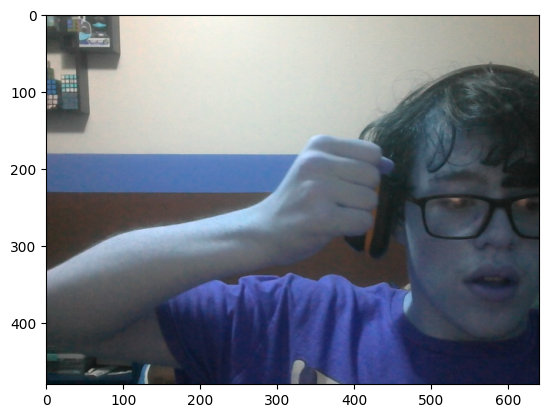

In [17]:
# test on one image
image = cv2.imread('./rock_paper_scissors/val/rock0.jpg')

# show image
plt.imshow(image)


In [57]:
# get box
label = load_label('./rock_paper_scissors/val/', 'rock0.txt')
label

array([1.        , 0.        , 0.        , 0.59296875, 0.46666667,
       0.2265625 , 0.3       ])

0.59296875 0.4666666666666667 0.2265625 0.3
379.5 224.0 145.0 144.0


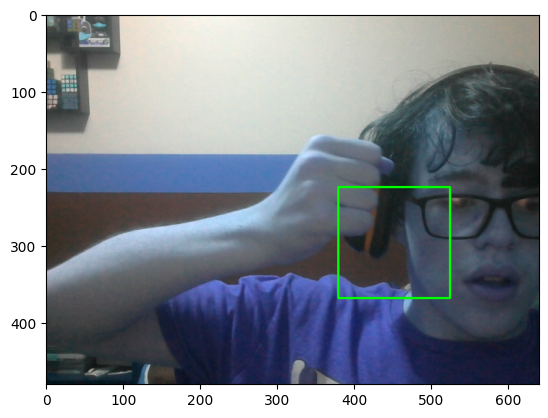

In [58]:
# draw box
x, y, w, h = label[3:]
print(x, y, w, h)
x, y, w, h = float(x), float(y), float(w), float(h)

x *= 640
y *= 480
w *= 640
h *= 480

print(x, y, w, h)

# draw rectangle
cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)

# show image
plt.imshow(image)

In [59]:
# predict
image2 = cv2.resize(image, (640, 480))
image2 = image2 / 255.0
image2 = np.array([image2])
prediction = model.predict(image2, verbose=0)
prediction

array([[9.9085677e-01, 1.6090555e-08, 4.0836387e-08, 6.0887989e-03,
        1.8844563e-03, 5.3416402e-04, 6.3583901e-04]], dtype=float32)

0.99085677 1.6090555e-08 4.0836387e-08
0.006088799 0.0018844563 0.000534164 0.000635839


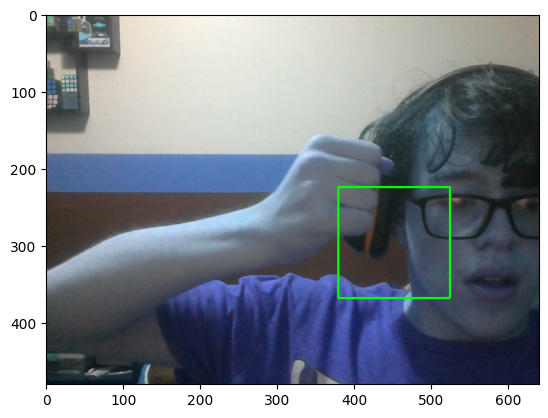

In [65]:
# draw the bounding box
t1, t2, t3, x, y, w, h = prediction[0]
print(t1, t2, t3)
print(x, y, w, h)

x *= 640
y *= 480
w *= 640
h *= 480

# draw rectangle
cv2.rectangle(image, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 3)

# show image
plt.imshow(image)
